In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pairs_train = pd.read_csv('data/alta16_kbcoref_train_pairs.csv', sep=',', index_col='Id')
labels_train = pd.read_csv('data/alta16_kbcoref_train_labels.csv', sep=',', index_col='Id')
data_train = pairs_train.join(labels_train, how='inner')
pairs_test = pd.read_csv('data/alta16_kbcoref_test_pairs.csv', sep=',', index_col='Id')

data_train.head()

,AUrl,BUrl,Outcome
Id,,,
0,www.allmusic.com/artist/sufjan-stevens-mn00005...,www.rollingstone.com/music/artists/sufjan-stevens,1
1,www.imdb.com/name/nm0346360,https://www.fandor.com/filmmakers/director-jos...,1
2,www.imdb.com/name/nm1017334,https://www.linkedin.com/in/juno-temple-32152375,1
3,https://www.linkedin.com/in/kathywolfe,https://twitter.com/RepWolfeMoore,0
4,https://www.linkedin.com/in/mipetersen,https://www.researchgate.net/profile/Mikael_Pe...,0


In [25]:
data_train.describe()

,Outcome
count,200.000000
mean,0.500000
std,0.501255
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


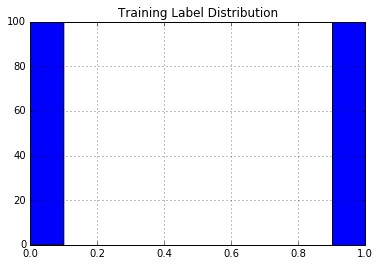

In [26]:
data_train.Outcome.hist()
plt.title("Training Label Distribution")

Посмотрим, разделяется ли выборка по косинусному расстоянию между tf ifd векторами url-в

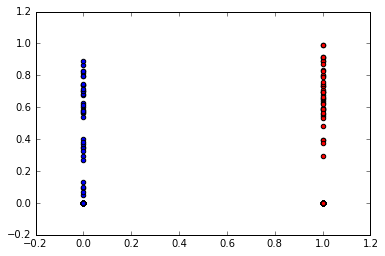

In [37]:
import tokenization as prep
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise

vocabulary = set()
pairs_train.apply(lambda row: vocabulary.update(prep.get_url_tokens(row['AUrl'])), axis=1)
pairs_train.apply(lambda row: vocabulary.update(prep.get_url_tokens(row['BUrl'])), axis=1)
pairs_test.apply(lambda row: vocabulary.update(prep.get_url_tokens(row['AUrl'])), axis=1)
pairs_test.apply(lambda row: vocabulary.update(prep.get_url_tokens(row['BUrl'])), axis=1)

# prepare train data
tfidf = TfidfVectorizer(tokenizer=prep.get_url_tokens, vocabulary=vocabulary)
td_matrix_a = tfidf.fit_transform(pairs_train['AUrl'])
td_matrix_b = tfidf.fit_transform(pairs_train['BUrl'])

distances = []
for i in xrange(td_matrix_a.shape[0]):
    dist = pairwise.cosine_similarity(td_matrix_a[i], td_matrix_b[i])
    distances.append(dist[0][0])

distances = np.array(distances)
class_0 = np.where(labels_train['Outcome'] == 0)[0]
class_1 = np.where(labels_train['Outcome'] == 1)[0]

plt.scatter(np.zeros(class_0.shape[0]), distances[class_0], c='b', marker='o')
plt.scatter(np.ones(class_1.shape[0]), distances[class_1], c='r', marker='o')
plt.show()